# cosa c'è in questo notebook 

Training di 4 reti neurali in grado di riconoscere dei set di gesti associati alla lingua americana dei segni (AmericanSignLanguage), tramite l'analisi di immagini statiche e metodi di image recognition.

Ho considerato la ASL anzichè la LIS (Lingua Italiana dei Segni)  dato che ho trovato molti piu esempi da scopiazzare per questa fase iniziale ma sopratutto perchè la quantita di dati disponibile è (forse?) ovviamente maggiore.

non credere all'hype, più che intelligenti le AI sono ingorde: + DATI + RISULTATO, qualsiasi la struttura del dato
detto questo se +dato comporta +risultato, allora perchè non cambiare il dato ;-)

Ciò nonostante il meccanismo è del tutto analogo, tanto dal punto di vista piu astratto di relazione di insiemi quanto da quello piu pratico per cui tra l'italiano e l'inglese-americano _comuni_ c'è un buon grado di traducibilità; ovvero dal punto di vista semiotico il residuo comunicativo non è eccessivamente significativo in quanto appartanenti alla stessa cultura occidentale ed aventi una simile origine a livello geografico e linguistico.

Il linguaggio utilizzato è __python3__ ed il framework AI/ML di paciocco è __tensorflow__ (di google) con __keras__ come API di alto livello.

I 4 modelli sotto allenati e pacioccati sono ordinati per crescente profondità di architettura (sono tutti modelli ConvolutionalNeuralNetwork) e quantita/complessità di dato, quindi si parte da scemo-piccolo e si arriva a saccente-grande.

PS  per sapere cosa sono CNN framework LIS, ASL ecc ecc dai un occhiata al wiki:
https://git.tropici.net/agropunx/geografia/wiki/_pages

PPS2
IO HO GIA SCARICATO PROCESSATO I DATI QUINDI IN CASO PROVA A CONTATTARMI DIRETTAMENTE

__General Imports__

In [3]:
# general
import os, random,pickle
from time import time
from tqdm import tqdm

#numeric and df
import pandas as pd
import numpy as np

#plot
import seaborn as sns
import matplotlib.pyplot as plt

# image and computer vision
import cv2
from  skimage.transform import resize
from IPython.display import Image

# data shuffling and metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# ML/AI stuff
import keras
from keras.layers import  MaxPooling2D,MaxPool2D, Dense, Flatten, Dropout
from keras.callbacks import TensorBoard, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from tensorflow.keras.utils import to_categorical

# modello ASL_static_A: 3-layer-CNN con dataset MNIST-AmericanSignLanguage

In [4]:
#Defining the Convolutional Neural Network

img_input = keras.Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu')(img_input)
x = MaxPooling2D(pool_size = (2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu')(img_input)
x = MaxPooling2D(pool_size = (2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu')(img_input)
x = MaxPooling2D(pool_size = (2, 2))(x)
x = Dropout(0.25)(x)

x = Flatten()(x)
x = units = Dense(512, activation = 'relu')(x)
x = Dropout(0.25)(x)
out = Dense(units = 25, activation = 'softmax')(x)

asl_static_A = keras.Model(inputs=img_input,outputs=out, name='asl_static_A')

asl_static_A.summary()

Model: "asl_static_A"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 128)      0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 13, 13, 128)       0         
                                                                 
 flatten (Flatten)           (None, 21632)             0         
                                                                 
 dense (Dense)               (None, 512)               11076096  
                                                      

In [5]:
def train(model, X_in, y_in, optimizer = Adam(learning_rate=.001), loss='categorical_crossentropy', metrics=['accuracy'],
          batch_size = 512, epochs = 50, verbose = 1):

    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    start = time()
    history = model.fit(X_in['train'], y_in['train'], batch_size=batch_size, epochs=epochs, validation_split=0.1, shuffle = True, verbose=1)
    train_time = time() - start

    #model.summary()
    plt.figure(figsize=(12, 12))
    plt.subplot(3, 2, 1)
    plt.plot(history.history['accuracy'], label = 'train_accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.subplot(3, 2, 2)
    plt.plot(history.history['loss'], label = 'train_loss')

#### Dataset source

MNIST dataset for the American Sign Language (ASL)

warnnn download tocca loggarsi

url https://www.kaggle.com/datamunge/sign-language-mnist

messo in ./data/mnist

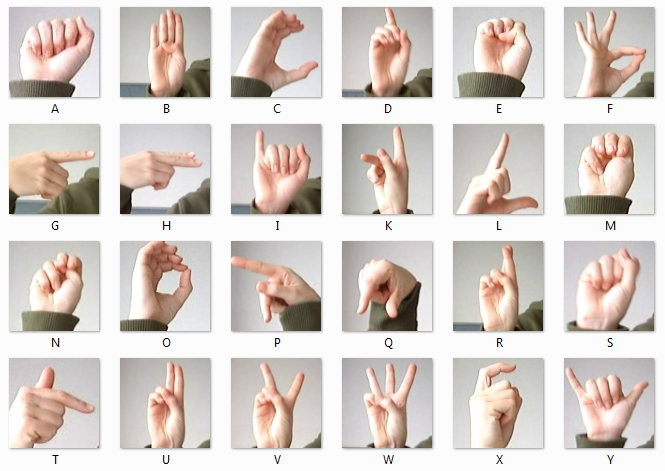

In [6]:
#Hand gestures of ASL
Image('data/mnist/amer_sign2.png')

In [7]:
train_df = pd.read_csv('data/mnist/sign_mnist_train.csv')
test_df = pd.read_csv('data/mnist/sign_mnist_test.csv')

train_df.head()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   
2     187  ...       202       201       200       199       198       199   
3     210  ...       235       234       233       231       230       226   
4     185  ...        92       105       105       108       133       163   

   pixel781  pixel782  pixel783  pixel784  
0       206       204       203       202  
1       175       103       135       149  
2       198       195       194       195  
3       225       222       229       163  
4       157       163       164       179  

[5 rows x 785 columns]

__prepara il dataset da allenare__

In [8]:
#labels
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]
X = {
    'train': train_df.values[:, 1:] / 255,
    'test': test_df.values[:, 1:] / 255
}

y = {
    'train': train_df.values[:, 0],
    'test' : test_df.values[:,0]
}


X['train'] = X['train'].reshape(X['train'].shape[0], *(28, 28, 1))
X['test'] = X['test'].reshape(X['test'].shape[0], *(28, 28, 1))

__nota__: 28x28x1 ----> immagini 28x28 con 1 canale cromatico (b/n)

__Train and Evaluate__

In [9]:
params = {
    'optimizer': Adam(learning_rate=.001),
    'loss' : 'sparse_categorical_crossentropy',
    'metrics' : ['accuracy'],
    'batch_size' : 512,
    'epochs' : 30,
    'verbose': 1,  
}

train(asl_static_A, X,y, **params)

Epoch 1/30
49/49 [==============================] - 24s 480ms/step - loss: 2.3351 - accuracy: 0.3831 - val_loss: 1.1610 - val_accuracy: 0.6934
Epoch 2/30
 7/49 [===>..........................] - ETA: 19s - loss: 1.2259 - accuracy: 0.6562

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-9-a7a727486f0a>", line 11, in <module>
    train(asl_static_A, X,y, **params)
  File "<ipython-input-5-dfa5e24106e0>", line 7, in train
    history = model.fit(X_in['train'], y_in['train'], batch_size=batch_size, epochs=epochs, validation_split=0.1, shuffle = True, verbose=1)
  File "/home/agropunx/.local/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
    return fn(*args, **kwargs)
  File "/home/agropunx/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1216, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/agropunx/.local/lib/python3.8/site-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "/home/agropunx/.local/lib/python3.8/site-packages/

KeyboardInterrupt: 

In [ ]:
asl_static_A.save("models/asl_static_A")

# modello ASL_static_B: 3-layer-CNN con dataset kaggle-AmericanSignLanguage

il modello è analogo a quello di prima (ASL_static_B) a parte che in questo caso aggiungo altri due canali in ingresso al modello (fondamentalmente prima b/n adesso RGB).

Il dataset invece è molto piu grande rispetto prima, quindi ci aspettiamo buoni risultati con poche epoche (ogni esempio viene visto dal modello tot epoche per training) prima dell'overfitting (momento in cui ri allenare sullo stesso dato diventa ridondante).

riduco quindi a 4 epoche, prima erano 30 per comun regola a casaccio

al dataset vengono aggiunti anche i segni relativi a _spazio_ , _cancella_ e _niente_

#### Dataset source:

American Sign Language (ASL)

url https://www.kaggle.com/grassknoted/asl-alphabet
    
warnnnnn download ---> size~1GB

messo in ./data/asl



In [ ]:
train_dir = 'data/asl/asl_alphabet_train/asl_alphabet_train'
test_dir = 'data/asl/asl_alphabet_test/asl_alphabet_test'
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
           'W', 'X', 'Y', 'Z', 'nothing', 'space', 'del']
plt.figure(figsize=(11, 11))
for i in range (0,29):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    path = train_dir + "/{0}/{0}1.jpg".format(classes[i])
    img = plt.imread(path)
    plt.imshow(img)
    plt.xlabel(classes[i])



In [ ]:
import tensorflow

In [ ]:
%%time

size=(32,32)

images = []
labels = []
index = -1
for folder in os.listdir(train_dir):
    index +=1
    for image in os.listdir(train_dir + "/" + folder):
        temp_img = cv2.imread(train_dir + '/' + folder + '/' + image)
        temp_img = cv2.resize(temp_img, size)
        images.append(temp_img)
        labels.append(index)
    
images = np.array(images)
images = images.astype('float32')/255.0
labels = tensorflow.keras.utils.to_categorical(labels)
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.1)
    
print('Loaded', len(x_train),'images for training,','Train data shape =', x_train.shape)
print('Loaded', len(x_test),'images for testing','Test data shape =', x_test.shape)

In [ ]:
input_img = keras.Input(shape=(32,32,3))

x = Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu')(input_img)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(128, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(256, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.BatchNormalization()(x)

x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='sigmoid')(x)
out = Dense(len(classes), activation='softmax')(x)

asl_static_B = keras.Model(inputs=input_img,outputs=out)

X = {
    'train':x_train,
    'test':x_test
}
y={
    'train':y_train,
    'test':y_test
}
params = {
    'optimizer': Adam(learning_rate=.001),
    'loss' : 'categorical_crossentropy',
    'metrics' : ['accuracy'],
    'batch_size' : 64,
    'epochs' : 4,
    'verbose': 1,
    
}

train(asl_static_B, X,y, **params)

In [ ]:
asl_static_B.save('models/asl_static_B')

# modello ASL_static_C: 3-layer-CNN con dataset kaggle-AmericanSignLanguage

dataset source analog al precedente, ma con qualche parola intera in piu rispetto al solo vocabolario composto da alfabeto e numeri, in totale ci sono 51 labels qua

il dataset è un po piu cicciotto quindi lancio il training differentemente, facendo batching degli esempi dalla cartella di origine (non ce la faccio a caricarlo tuttassieme nella ram)

In [1]:
train_dir='data/asl/sign_digit_fewWords'

In [2]:
data_generator = ImageDataGenerator(
    samplewise_center=True, 
    samplewise_std_normalization=True,
    brightness_range=[0.8, 1.0],
    zoom_range=[1.0, 1.2],
    validation_split=0.1
)

train_generator = data_generator.flow_from_directory(train_dir, target_size=(200,200), shuffle=True, seed=13,
                                                     class_mode='categorical', batch_size=64, subset="training")

validation_generator = data_generator.flow_from_directory(train_dir, target_size=(200, 200), shuffle=True, seed=13,
                                                     class_mode='categorical', batch_size=64, subset="validation")



NameError: name 'ImageDataGenerator' is not defined

In [ ]:
from keras.layers import BatchNormalization
from tensorflow.keras import regularizers
input_img = keras.Input(shape=(200,200,3))
    
x = Conv2D(64, kernel_size = [3,3], padding = 'same', activation = 'relu', input_shape = (200,200,3))(input_img)
x = MaxPool2D(pool_size = [3,3])(x)
    
x = Conv2D(128, kernel_size = [5,5], padding = 'same', activation = 'relu')(x)
x = MaxPool2D(pool_size = [3,3])(x)
    
x = Conv2D(256, kernel_size = [3,3], padding = 'same', activation = 'relu')(x)
x = MaxPool2D(pool_size = [3,3])(x)
    
x = BatchNormalization()(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
    
x = Dense(1024, activation = 'relu', kernel_regularizer = regularizers.l2(0.001))(x)
x = Dense(512, activation = 'relu', kernel_regularizer = regularizers.l2(0.001))(x)
out = Dense(51, activation = 'softmax')(x)
asl_static_C = keras.Model(inputs=input_img,outputs=out)

asl_static_C.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics = ["accuracy"])

In [ ]:
model_hist = asl_static_C.fit_generator(train_generator,
                                validation_data=validation_generator,
                                steps_per_epoch=200,
                                validation_steps=50,
                                epochs=15,
                              )


In [ ]:
asl_static_C.save('models/asl_static_C.h5')

# ASL_static_D - inception transfer learning

Qua si prende un modello noto di google chiamato __inceptionv3__ https://keras.io/api/applications/inceptionv3/ come punto di partenza per il successivo training del task di classificazione immagini.
in questo caso si parla di transfer-learning.

il dataset è identico a quello di prima (asl_static_C).

In [ ]:
training_dir=train_dir
content=sorted(os.listdir(training_dir))
print(content)
len(content)

In [ ]:
WEIGHTS_FILE = './inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

inception_v3_model = keras.applications.inception_v3.InceptionV3(
    input_shape = (200, 200, 3), 
    include_top = False, 
    weights = 'imagenet'
)

inception_v3_model.summary()



In [ ]:
inception_output_layer = inception_v3_model.get_layer('mixed7')
print('Inception model output shape:', inception_output_layer.output_shape)

inception_output = inception_v3_model.output

In [ ]:
from tensorflow.keras import layers
x = layers.GlobalAveragePooling2D()(inception_output)
x = layers.Dense(1024, activation='relu')(x)                  
x = layers.Dense(51, activation='softmax')(x)           

asl_static_D = Model(inception_v3_model.input, x) 

asl_static_D.compile(
    optimizer=SGD(lr=0.0001, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['acc']
)
for layer in model.layers[:249]:
    layer.trainable = False
for layer in model.layers[249:]:
    layer.trainable = True



In [ ]:
LOSS_THRESHOLD = 0.2
ACCURACY_THRESHOLD = 0.95

class ModelCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_loss') <= LOSS_THRESHOLD and logs.get('val_acc') >= ACCURACY_THRESHOLD:
            print("\nReached", ACCURACY_THRESHOLD * 100, "accuracy, Stopping!")
            self.model.stop_training = True

callback = ModelCallback()


In [ ]:
history = asl_static_D.fit_generator(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=200,
    validation_steps=50,
    epochs=20,
    callbacks=[callback]
)


In [ ]:
asl_static_D.save('models/asl_static_D.h5')

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()



plt.show()

# asl_static_C VS asl_static_D

Considerando lo stesso dataset e labelset, confronto tra il modello C (3Layer-3Channel shallow CNN) e D (transfer learning da modello con milamilioni di paramentri super sblindato di google)

Qual'è meglio?

A che prezzo?

In [ ]:
asl_static_C = keras.models.load_model('models/asl_static_C.h5')
asl_static_D = keras.models.load_model('models/asl_static_D.h5')

In [ ]:
data_generator = ImageDataGenerator(
    samplewise_center=True, 
    samplewise_std_normalization=True,
    brightness_range=[0.8, 1.0],
    zoom_range=[1.0, 1.2],
    validation_split=0.1
)

test_generator = data_generator.flow_from_directory(train_dir, target_size=(200, 200), shuffle=False, seed=13,
                                                     class_mode='categorical', batch_size=64, subset="validation")



In [ ]:
%%time
predictions_C = asl_static_C.predict(test_generator, workers=-1, use_multiprocessing=True, verbose=1)

In [ ]:
%%time
predictions_D = asl_static_D.predict(test_generator, workers=-1, use_multiprocessing=True, verbose=1)

In [ ]:
assert predictions_D.shape==predictions_C.shape
predictions_D.shape

In [ ]:
!du models/asl_static_C.h5

In [ ]:
!du models/asl_static_D.h5

In [ ]:
yp_C = np.argmax(predictions_C,axis=1)
yp_D = np.argmax(predictions_D,axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix_C = confusion_matrix(test_generator.classes, yp_C)
confusion_matrix_D = confusion_matrix(test_generator.classes, yp_D)

fig,axs = plt.subplots(1,2,figsize=(20,10))
sns.heatmap(confusion_matrix_C,ax=axs[0])
axs[0].set_title('asl_static_C')
sns.heatmap(confusion_matrix_D,ax=axs[1])
axs[1].set_title('asl_static_D - tf inception')

piu stai sulla diagonale meglio è (considerate le stesse 51 classi, l'asse delle y corrisponde ai valori predetti, l'asse delle x invece ai valori attuali per i sample di test (ground_truth)

In [ ]:
mapx={v:k for k,v in test_generator.class_indices.items()}
upto=5
print("asl_static_C prediction for 5 samples of '1' gesture samples:")
print([mapx[xx] for xx in yp_C[:5]])
print('\nsame for model asl_static_D:')
print([mapx[xx] for xx in yp_D[:5]])

In [ ]:
print('these were the original photos')
fig,axs = plt.subplots(1,5,figsize=(50,10))
for filename,ax in zip(test_generator.filenames[:5],axs.flatten()):
    img = cv2.imread(f'{train_dir}/{filename}')
    ax.imshow(img)

__conclusione__

asl_static_D è il vincitore, ha 4 volte piu parametri (che in scala sono comunque molti anche per asl_static_C ~5'000'000) ma è molto piu sicuro.